In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('desafio1.csv')

In [3]:
data.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
data.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

In [5]:
data.dtypes

RowNumber                     int64
id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object

In [35]:
data.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [59]:
estados = data['estado_residencia'].unique()
estados

array(['SC', 'RS', 'PR'], dtype=object)

# Qual estado possui os clientes com melhores pontuações de crédito?

In [46]:
media = data.groupby('estado_residencia')['pontuacao_credito'].mean()
media

estado_residencia
PR    648.961294
RS    651.105143
SC    649.537653
Name: pontuacao_credito, dtype: float64

In [48]:
mediana = data.groupby('estado_residencia')['pontuacao_credito'].median()
mediana

estado_residencia
PR    650
RS    650
SC    653
Name: pontuacao_credito, dtype: int64

In [33]:
desvio_padrao = data.groupby('estado_residencia')['pontuacao_credito'].std()
desvio_padrao

estado_residencia
PR    98.607186
RS    95.136598
SC    97.233493
Name: pontuacao_credito, dtype: float64

In [39]:
moda = data.groupby('estado_residencia')['pontuacao_credito'].agg(pd.Series.mode)
moda

estado_residencia
PR    850
RS    850
SC    850
Name: pontuacao_credito, dtype: int64

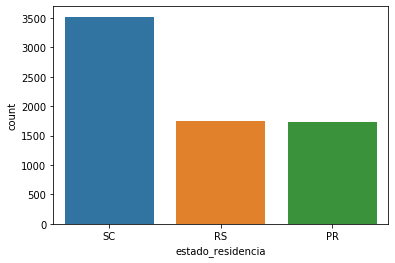

In [20]:
sns.countplot(x='estado_residencia', data=data)
plt.show()

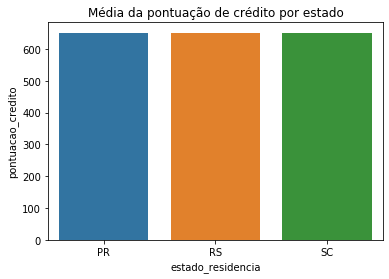

In [24]:
sns.barplot(x='estado_residencia', y='pontuacao_credito',
            data=data.groupby('estado_residencia')['pontuacao_credito'].mean().reset_index())
plt.title('Média da pontuação de crédito por estado')
plt.show()

In [60]:
ans_dict = {estados[0]: {"moda": moda[2], "mediana": mediana[2], "media": media[2], "desvio_padrao": desvio_padrao[2]},
            estados[1]: {"moda": moda[1], "mediana": mediana[1], "media": media[1], "desvio_padrao": desvio_padrao[1]},
            estados[2]: {"moda": moda[0], "mediana": mediana[0], "media": media[0], "desvio_padrao": desvio_padrao[0]}}
ans_dict

{'SC': {'moda': 850,
  'mediana': 653,
  'media': 649.5376527422563,
  'desvio_padrao': 97.23349279343314},
 'RS': {'moda': 850,
  'mediana': 650,
  'media': 651.1051428571428,
  'desvio_padrao': 95.1365984138358},
 'PR': {'moda': 850,
  'mediana': 650,
  'media': 648.9612940496822,
  'desvio_padrao': 98.60718591309755}}

In [62]:
ans_df = pd.DataFrame(ans_dict)
ans_df

,SC,RS,PR
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


In [63]:
ans_df.to_json('submission.json')